# Code management

We will present a few key concepts about software management. Modern
practises of software management (especially within a group of
developers) have evolved into the so-called
[DevOPS](https://en.wikipedia.org/wiki/DevOps) methodology, which
integrates several steps to develop, test and release software.

## Branching

`git` allows you to keep multiple instances of your project
using **branches**.

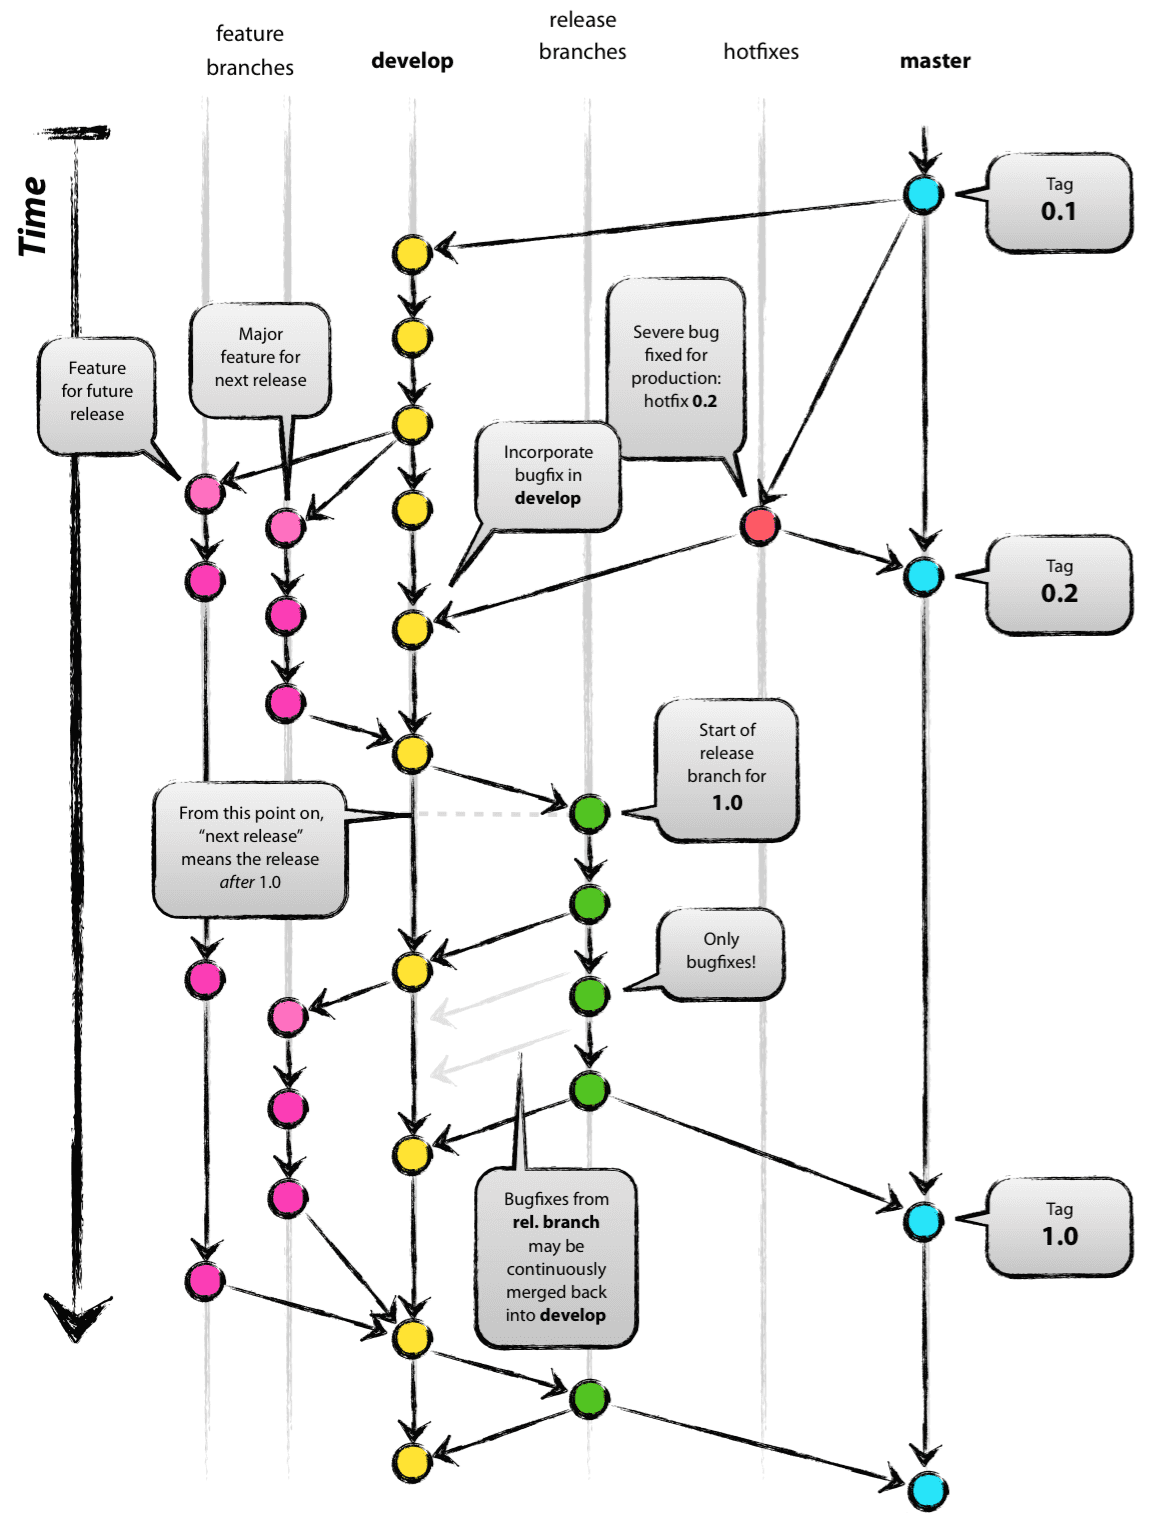

From <https://nvie.com/posts/a-successful-git-branching-model/>

**Keep it simple:** a single master / main branch


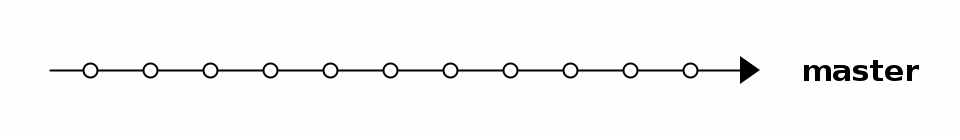

Use **feature branches** for new / experimental features


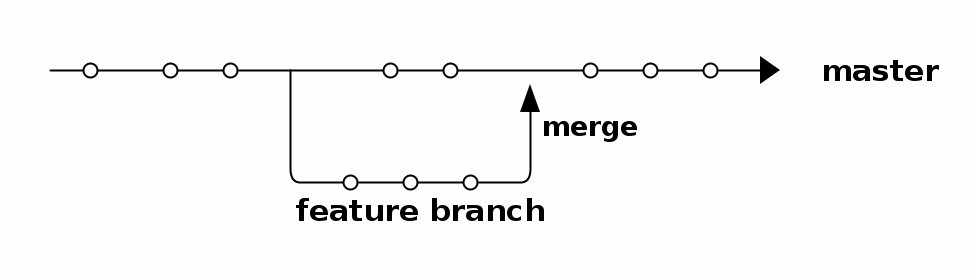

You can work on several branches, but only one at a time can be
\"checked out\". Keep an eye on the prompt to know which branch you are
on, or use the following command


In [ ]:
! git branch -va

For collaborations, you may want to follow [GitHub
flow](https://docs.github.com/en/get-started/quickstart/github-flow) or
a similar practise.

## Tagging

**Tag** your releases whenever you need to provide an official version
of your code, like `1.0.0`. Actually, the tag can be be any
string, it need not be a numeric version.

This information is typically stored in some file within the code
folder, so you should remember to update it when a new version is ready.
I will assume this is done with some script


In [ ]:
! ./update_version 1.0.0

Then you can commit the change with


In [ ]:
! git commit -am "Bump version 1.0.0"

Finally, you can create a tag. A `git` tag is just a label
attached to a commit


In [ ]:
! git tag 1.0.0

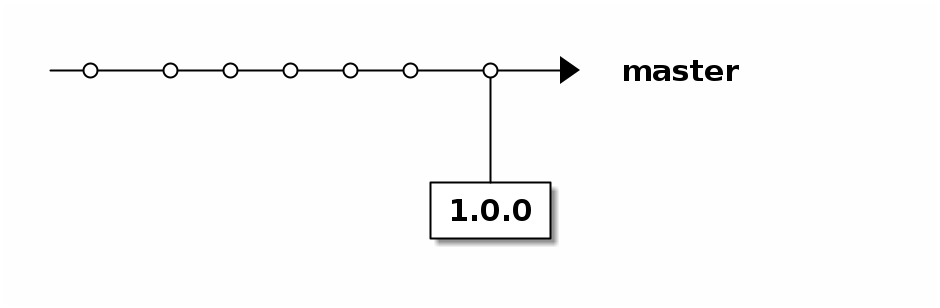

To get a list of the current tags


In [ ]:
! git tag -l

Finally, to push the tag `1.0.0` to the server


In [ ]:
! git push 1.0.0

## Versioning

Possible software versioning schemes:

-   `X`: simple incremental versioning
-   `X.Y`: major-minor (ex: `0.1`, that\'s where
    you start from)
-   `X.Y.Z`: major-minor-patch (ex. git `2.17.1`)
-   `X.Y.Z.*`: alpha / beta / release candidate info

There is one very reasonable way to decide how to increment versions:
**semantic versioning** <https://semver.org>

In a nutshell:

-   increase `X`: **backward incompatible changes**
-   increase `Y`: new features
-   increase `Z`: *cosmetics*


**Note**:
While semantic versioning does not fix /all/ the issues related to *dependencies* between multiple software versions (aka [[https://en.wikipedia.org/wiki/Dependency_hell][dependency hell]]!), it is a highly recommended practise. The underlying assumption is that =X= evolves on a slower time scale than =Y= and that the public API of the code is stable enough.

## A Python package template

[This repository](https://framagit.org/coslo/template-python) contains a
template Python package that you can use to start new software projects
based on Python. It is meant to illustrate in a specific case some
general features of code management, which are largely independent of
the programming language of your choice.

Clone the project into the `my_new_code` folder


In [ ]:
! git clone https://framagit.org/coslo/template-python.git my_new_code

and delete the `.git/` folder at the root of directory
`my_new_code`, so that you can start developing a brand new
code.

*Useful references*:

-   <https://github.com/pypa/sampleproject>
-   <https://packaging.python.org/en/latest/tutorials/packaging-projects/>

### Environment setup

You should provide a list of packages / libraries on which your code
*depends.*

*Rules of thumb*:

1.  **Freeze the the major versions** (`X`) **of all
    dependencies**, to avoid changes to the public API to break your
    code
2.  **Provide a lower bound on** `Y`, corresponding to the
    lowest minor version that is compatible with your code

Rule 1. can be relaxed if you realize that your code is working with a
more recent major version.

In practice, Python provides a few ways means to define dependencies:

1.  `requirements.txt`: provide a [list of
    packages](https://pip.pypa.io/en/stable/reference/requirements-file-format/)
    to be installed via the `pip` package manager (see a few
    paragraphs further down)
2.  `pyproject.toml`: currently [the official
    way](https://setuptools.pypa.io/en/latest/userguide/pyproject_config.html)
    of handling dependencies and code packaging in Python projects

For instance, this is an excerpt of `requirements.txt` in the
[template-python](https://framagit.org/coslo/template-python/-/blob/main/tests/test_hello.py)
project


argh>=0.28.1

For finer control on package versions, see the [official pypa
documentation](https://pip.pypa.io/en/stable/reference/requirements-file-format/).

I recommend to keep a **per-project** Python virtual environment for
every code you develop and to delete old environments from time to time.
The [venv](https://docs.python.org/3/library/venv.html) package has been
integrated in Python since version 3.6 and provides a simple and fairly
robust way to handle Python virtual environments, described in full
details in this [nice
tutorial](https://realpython.com/python-virtual-environments-a-primer/).

In essence, make sure the `venv` package is installed in the
Python distribution provided by you OS (this may require
`sudo apt install python-venv` or analogous command for your
OS). To check if you have it, type


In [ ]:
! python -m venv env

This will create a directory named `env/` in the current
directory. To activate the environment


In [ ]:
! . env/bin/activate

Note the dot (`.`) at the beginning of the command! If your
prompt is correctly set up, it will tell you that you are working in
that specific environment.

Check which Python executable are we using now


In [ ]:
! which python

Then install your dependencies


In [ ]:
! pip install -r requirements.txt

and you are ready to develop and test your code. If you need additional
Python packages for code development, just install them in the
`env` environment.

Alternatively, you can install your package with `pip` in
editable mode (although at the time of writing, this does not work with
`pyproject.toml` unless you use the `flint` build
backend)


In [ ]:
! pip install -e .

`pip` can install also local or remote python projects (over
a network, on a remote git server, ...), see [this
link](https://pip.pypa.io/en/stable/topics/vcs-support/)


In [ ]:
! # A local version of numpy
! pip install /home/coslo/usr/numpy
! # A specific tag / branch / commit of numpy from github
! pip install numpy@git+https://github.com/numpy/numpy@v1.21.0

When you are done working with this virtual environment, deactivate it


In [ ]:
! deactivate

**Note**:
Consider the virtual environment as /disposable/: it should always be possible to delete it and recreate at any time from a requirements.txt file. Keeping multiple environments can easily eat a lot of disk space, so remember to delete them when they are not actively needed anymore.

### Unit testing

From <https://en.wikipedia.org/wiki/Unit_testing>


```
Unit testing is a software testing method by which individual units of
source code are tested to determine whether they are fit for use
```

In Python, the `unittest` package provides a rather
straigthforward approach to unit testing. Just keep one or multiple
files with your tests in a `tests/` folder, where each file
has the following structure


In [ ]:
import unittest

class Test(unittest.TestCase):

    def setUp(self):
        # Executed at the beginning of each Test method
        pass

    def test_simple(self):
        self.assertTrue(True)
        self.assertEqual(1, 1)
        self.assertAlmostEqual(1.0, 1.0)
        
    def tearDown(self):
        # Executed at the end of each Test method
        pass

You should of course import your own package and perform some actual
tests in there, but you should get the idea.

To see this in action, let\'s use
[template-python](https://framagit.org/coslo/template-python/-/blob/main/tests/test_hello.py)
again. From the root of the package, execute


In [ ]:
! python -m unittest discover -s tests

To execute a single test


In [ ]:
! python -m unittest tests.test_hello.Test.test_hello

**Note**:
There are ways to execute these tests within you code editor, which lets you jump to the relevant line of code in case a test fails (ex. =Ctrl+C Ctrl+T= in emacs).

Ideally, the tests should cover almost 100% of the source code of your
package - however, this does not guarantees that it will *always* run
correctly in all circumstances! To check how much is your **code
coverage**, you can use the `coverage` package


In [ ]:
! coverage run -m unittest discover -s tests
! coverage report

```
.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK
Name                    Stmts   Miss  Cover
-------------------------------------------
mypackage/__init__.py       0      0   100%
mypackage/cli.py            6      2    67%
tests/test_hello.py         9      0   100%
-------------------------------------------
TOTAL                      15      2    87%
```

### Continuous integration

From <https://en.wikipedia.org/wiki/Continuous_integration>


```
Continuous integration (CI) the practice of merging all developers'
working copies to a shared mainline several times a day. Nowadays it
is typically implemented in such a way that it triggers an automated
build with testing.
```

The goal is to spot bugs quickly and to reduce the chance of conflicts
between the main branch and those on which other developers are working.

In practice, this means that code testing and other tasks (ex.
generating code documentation) are executed every time you push your
code repository to your git server, which will perform these tasks
remotely and send you an e-mail if anything fails. While this is rather
overkill for single-user projects, it is very useful for large
collaborations.

There are several implementations of CI and the main git platforms
(github and gitlab) provide their own too

-   [GitHub Actions](https://docs.github.com/en/actions) (see also [this
    example](https://github.com/pypa/sampleproject/tree/main/.github/workflows))
-   [GitLab CI](https://docs.gitlab.com/ee/ci/)
-   Jenkins, Travis, ...

Here we have a look at a minimal GitLab CI configuration, which performs

-   **unit tests** on different Python versions
-   **documentation** update

At the root of the template project you will find a file
`.gitlab-ci.yml` with the following content.


before_script:
  - python -V  # print out python version for debugging
  - pip install virtualenv
  - virtualenv env
  - source env/bin/activate
  - pip install -r requirements.txt

.test:
  script:
    - pip install coverage
    - coverage run -m unittest discover -s tests
  artifacts:
    paths:
      - .coverage
  coverage: '/^TOTAL.+?(\d+\%)$/'

The target `before_script` will install all necessary
dependencies in a virtual environment, while `.test` provides
a template for running a code coverage and extracting the corresponding
coverage fraction.

We can now add targets to perform the above tasks for different Python
versions using different [Docker images](https://www.docker.com).


test:3.8:
  image: python:3.8
  extends: .test

test:latest:
  image: python:latest
  extends: .test

We also add a target to generate the documentation from the files under
`docs` and move them to a public web page accessible on the
gitlab server (the path is specific to each GitLab instance). The
parameter `only` performs this task only when a new tag is
created and pushed to the git server (eco-friendly practise).


pages:
  script:
    - pip install sphinx
    - make -C docs html
    - mv docs/_build/html public
  artifacts:
    paths:
      - public
  only:
    - tags

Through this mechanism you can check the status of the tests, coverage
and doc generation from the project web page.

# An overview of Python

## Compiled vs. interpreted languages

From <https://en.wikipedia.org/wiki/Compiler>:


```
In computing, a compiler is a computer program that translates
computer code written in one programming language (the source
language) into another language (the target language).
```

From <https://en.wikipedia.org/wiki/Interpreter_(computing)>:


```
In computer science, an interpreter is a computer program that
directly executes instructions written in a programming or scripting
language, without requiring them previously to have been compiled into
a machine language program.
```

|                   | **Compiled**                      | **Interpreted**                      |
|-------------------|-----------------------------------|--------------------------------------|
| **Advantages**    | Fast execution                    | Dynamic types; platform independence |
| **Disadvantages** | Slow testing; platform dependence | Translation overhead at run time     |

Actually, Python code is typically first translated to bytecode, then
interpreted. But it can also be compiled \"just-in-time\" (for instance
with [pypy](https://doc.pypy.org/en/latest/), which claims to be on
average \~5 times faster than the official `CPython`
distribution).

## The Python ecosystem

Built upon:

-   [Python standard
    library](https://docs.python.org/3/library/index.html):
    specification of the core language features and modules
-   CPython: an **official distribution** that implements the standard
    library (typically installed in
    `/usr/lib/python3/dist-packages/)`
-   Python distributions alternative to the official one (ex.
    [pypy](https://www.pypy.org/pypy),
    [anaconda](https://www.anaconda.com/))
-   [Python Package Index](https://pypi.org/) (**pypi**): a large,
    official repository of third-party modules and packages
-   **Package managers**: software to install packages and handle their
    dependencies (ex. [pip](https://pip.pypa.io/en/stable/),
    [poetry](https://python-poetry.org/))
-   **Virtual environments**: isolated, local installations of Python
    distributions (ex.
    [venv](https://realpython.com/python-virtual-environments-a-primer/),
    [conda](https://docs.conda.io/en/latest/))

## Useful links

Python tutorials proliferates on the internet. There are, however, a few
authoritative sources of information:

-   The **official documentation** available at
    <https://docs.python.org/3/library/>
-   The integrated documentation accessible from the **interactive
    python** and available in any IDE, notebook etc.

In addition

-   [Stack overflow](https://stackoverflow.com/questions/tagged/python)
    provides a wealth of information on both general and very specific
    issues about the Python language
-   [The hitchhiker\'s guide to python](https://docs.python-guide.org/)
    by Kenneth Reisz is an excellent, general-purpose guide to Python
-   [Real Python tutorials](https://realpython.com/) are pretty good,
    too
-   The [w3school tutorial](https://www.w3schools.com/python/) is quite
    extensive and code snippets can be executed live

## A matter of style

The golden rules to write top-quality Python code are crystallized in
[PEP-8](http://legacy.python.org/dev/peps/pep-0008/)


```
"One of Guido's key insights is that code is read much more often than
it is written. The guidelines provided here are intended to improve
the readability of code and make it consistent across the wide
spectrum of Python code. As PEP 20 says, Readability counts."
```

While Python tolerates ad-hoc custom conventions on spacings, name
conventions etc, the PEP-8 provides the authoritative reference to write
good Python code. There are package and tools that help you clean up
your code automatically, such as
[flake8](https://pypi.org/project/flake8/),
[autopep](https://pypi.org/project/autopep/),
[black](https://pypi.org/project/black/)...

## A matter of philosophy

The philosophy of Python coding is beautifully described by the
`Zen of Python` (**PEP-20**), which you should deeply ponder
every night before going to sleep


```
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one -and preferably only one- obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than right now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea - let's do more of those!
```

## Command line interface (CLI)

When a Python code has to be executed from the command line, it is good
practice to encapsulate an entry point in a `main()`
function.


In [ ]:
def main(verbose=False):
    if verbose:
        return 'Hello world!'

The `main()` function will be called only when the code is
executed from the command line


In [ ]:
if __name__ == 'main':
    main()

To parse parameters on the command line and pass them to
`main()` you can use the `sys.argv` list. The
[argparse](https://docs.python.org/3/library/argparse.html) standard
module is the official library to add a command line interface to a
Python code. However, there are better alternative: if you want to
quickly add a command line interface for your Python codes, a good
choice is the
[argh](https://argh.readthedocs.io/en/latest/tutorial.html) package (see
also [click](https://click.palletsprojects.com/en/stable/)). Use the
`dispatch_command()` function to create a CLI for your
`main()` function:


In [ ]:
def main(verbose=False):
    """Say Hello to the world"""
    if verbose:
        return 'Hello world!'

if __name__ == '__main__':
    from argh import dispatch_command
    dispatch_command(main)

Say we saved the script in `/tmp/main.py`. If you execute it
from the command line, you will now get a nice help message that
explains how to pass parameters to your Python script


In [ ]:
! python /tmp/main.py --help

## The dark side

A highly recommended reading: [Facts and myths about Python names and
values](https://nedbatchelder.com/text/names.html)

### Names are bindings to objects

Variables in Python behave differently then in statically-types
languages like C or Fortran. See this example:


In [ ]:
x = 1
print(x, type(x))
x = 1.0
print(x, type(x))
x = 'hello world'
print(x, type(x))

It may look like `x` is

1.  born as an integer
2.  later becomes a floating point number
3.  and finally a string

What is `x`, actually? `x` is a name, which first
refers to object `1`, then object `1.0` and
finally an object `'hello world'`. Almost everything in
Python is an \"object\" and variables (\"names\") are just references
(\"bindings\") to them. To sum up: **names are bindings to objects**.


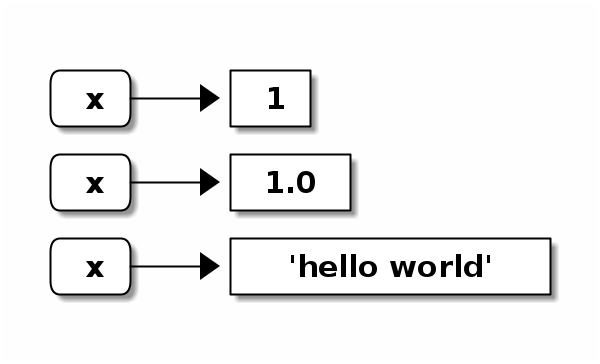

Get the \"identifier\" of the object referenced by `x` with
the `id()` function


In [ ]:
x = 1
id(x)

Now increment `x` by one


In [ ]:
x = x + 1
id(x), id(2)

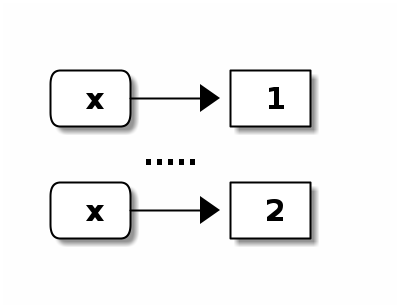

What happened? `x` got assigned to a new object
(`2`) with a different id. We did not modify an integer
variable, we just created a new one and assigned `x` to it!
This is because in Python integers are \"immutable\" objects.

### Mutable and immutable objects

An object is **mutable** if its \"state\" (in terms of its \"instance
variables\") can be changed and **immutable** otherwise. Immutable
objects can only be reassigned, not modified. Integers, floats and
strings are examples of immutable objects: you cannot change them, only
create new ones if they do not exist yet.

Another classic example of mutable vs. immutable data structures in
Python are **lists** and **tuples.**

Lists can be modified in-place using the `[...]` syntax (they
are \"subscriptable\")


In [ ]:
mutable = [0, 1, 2]
mutable[0] = "x"
mutable

But tuples are immutable so you\'ll get an error


In [ ]:
not_mutable = (0, 1, 2)  # A tuple
not_mutable[0] = "x"

Numpy arrays are mutable and subscriptable too: it is crucial, however,
to use the `[...]` syntax for in-place modifications


In [ ]:
import numpy

x = numpy.array([0, 1, 2])
x[0] = 1  # subscriptable
print(x, id(x))
x += 1  # in-place modification
print(x, id(x))
x[:] = x + 1  # in-place modification
print(x, id(x))
x = x + 1  # reassignement
print(x, id(x))

There *are* actually mutable integers and floats: `numpy`
**0-arrays**. They will be useful when interfacing Python with Fortran
(see below).

A 0-array can be declared like this


In [ ]:
import numpy
x = numpy.array(1)
x, type(x), id(x)

Increment it in-place using the `+=` syntax (no reassigment)


In [ ]:
x += 1
x, type(x), id(x)

**Note**:
The shape of a 0-array is an empty tuple.

### Non-locality

OK, this can be tricky. Here


In [ ]:
x = [1, 2]
y = x

we understand that both `x` and `y` refer to the
same list


In [ ]:
print(id(x) == id(y), x is y)

When we add an element to `x`, `y` is modified as
well, because `x` is modified *in-place* and `y`
still refers to the very same object


In [ ]:
x.append(3)
print(x, y)

This behavior holds in general for mutable objects and can be quite
confusing, in particular when passing arguments to *functions* or when
complex objects *share* data.

However, the behavior is different with *immutable* objects.


In [ ]:
x = 1
y = x

The above statements bind again `y` to the same object as
`x`


In [ ]:
print(id(x) == id(y), x is y)

But when we increment `x,` we actually *bind* it to the
object `2` while `y` still refers to
`1`


In [ ]:
x += 1
print(x, y)

If we do the same thing with a 0-array, both `x` and
`y` \"gets modified\"


In [ ]:
import numpy

x = numpy.array(1)
y = x
x += 1
x, y

Of course, that\'s because the modification is done in-place and both
`x` and `y` are assigned to the same object. To
check if two arrays share *some* data, use


In [ ]:
numpy.shares_memory(x, y)

This behavior holds in general for mutable objects and can be quite
confusing, in particular when passing arguments to functions or when
complex objects *share* data.

### Making copies of objects

Given the above situation, it can be useful to make copies of an object.
For lists, it is enough to use


In [ ]:
z = list(x)

In a more general situation, however, we use the
[copy](https://docs.python.org/3/library/copy) module for that.


**Note**:
Modules in Python are files containing reusable code. Many modules are shipped with the [[https://docs.python.org/3/library/][Python standard library]], but you can easily create your own.

After importing the module, we can use the two functions defined within
it: `copy` and `deepcopy`.


In [ ]:
import copy

x = [1, 2]
y = copy.copy(x)
print(x is y)
x.append(3)
print(x, y)

Keep in mind that `copy()` only makes a **shallow** copy: if
the object contains other objects that hold references inside, the
objects pointed by those references will not be copied. To make sure we
have a **full** copy, use `deepcopy()` instead


In [ ]:
y = copy.deepcopy(x)

What happens if you try to make a copy of an /immutable/ object?

**Exercise**: in the case of immutable object, we get the same results
with `copy` and `deepcopy`. To try out the
difference, make copies of nested lists, that is a list of lists, and
check the `id` of an element of the list after
`copy` and `deepcopy`.

### Numerical precision of numpy arrays

Bear in mind that there are limitations with the numerical precision of
numpy arrays. The behavior of `numpy` may not be the one you
expect esepcially if you need precision higher than `double`
(64 bits).

See for instance:

-   the [numpy
    doc](https://numpy.org/doc/stable/user/basics.types.html#extended-precision)
    on precision issues
-   this [thread of
    reddit](https://www.reddit.com/r/learnpython/comments/3l7f3v/a_sneaky_numpy_feature_for_anyone_interested_in/)
    (note the comment by the OP professor: \"*Python is a \'toy
    language\' due to inaccuracy*\")
-   it seems impossible to just set [single
    precision](https://github.com/numpy/numpy/issues/6860) by default

### Numpy arrays can be slower than lists

Lists are very powerful and flexible data structures, but they are very
slow for number crunching calculations: accessing the entries of a list
is pretty inefficient. Numpy arrays are generally faster... but this is
not always the case. Let\'s see why.

Let\'s do some simple linear algebra on the elements on two
5000-elements lists


In [ ]:
N = 5000
x = [1.0] * N
y = [2.0] * N
z = [0.0] * N
a = 1.0

# Repeat the inner loop many times and time the execution
import time
t_i = time.time()
for _ in range(1000):
    for i in range(N):
        z[i] = x[i] + a * y[i]
t_f = time.time()
print('Elapsed time: {:.2f} s'.format(t_f - t_i))

We have repeated the inner loop many times to increase the computational
time.

Let us do the same with the `numpy` arrays, transforming the
lists `x`, `y`, `z` into numpy arrays


In [ ]:
x = numpy.array([1.0] * N)
y = numpy.array([2.0] * N)
z = numpy.array([0.0] * N)

t_i = time.time()
for _ in range(1000):
    for i in range(N):
        z[i] = x[i] + a * y[i]
t_f = time.time()
print('Elapsed time: {:.2f} s'.format(t_f - t_i))

As you noticed, things have not improved at all, quite the opposite
actually! The problem is that numpy arrays are only efficient **when
operations are done on arrays as a whole** (or on arrays slices), not
element-wise. Let\'s try this way:


In [ ]:
t_i = time.time()
for _ in range(1000):
    z[:] = x[:] + a * y[:]
t_f = time.time()
print('Elapsed time: {:.2f} s'.format(t_f - t_i))

This time, it is about two orders of magnitude faster! Notice how we
have used a \"vector syntax\" to express the fact that the linear
combination of the two arrays can be performed **element-wise**. Fortran
programmers will recognize the familiar syntax for array operation
(which, indeed, was introduced in Fortran years before
`numpy` was born...).

We can also use the following syntax to get the same result.


In [ ]:
import numpy
for _ in range(1000):
    z = x + a * y

Notice, however, that in the code above `z` will be
reassigned at every loop iteration.

It is also possible to operate on array subsections using a powerful
**slicing** syntax such as


In [ ]:
# Copy the first 10 elements
z[0: 10] = a * y[0: 10]

# Can you guess what this does?
z[0: 10: 2] = a * y[-1: -10: -2]

The `numpy` package provides general n-dimensional arrays to
do efficient linear algebra on matrices of arbitrary dimensions. Let us
define a 2x3 matrix


In [ ]:
import numpy
N, M = 2, 3

# Matrix, elements are uninitialized
x = numpy.ndarray((N, M))
print(x.shape)
print(x)

# Matrix, all elements set to zero
x = numpy.zeros((N, M))
print(x)

The `shape` attribute is a tuple that specifies the size of
the array along each dimension.

The `numpy` package implements several operations on arrays
and matrices, such as transpose, dot and outer product and many others.
An even more complete environment for linear algebra is provided by the
`scipy` package.

# Faster Python

## Interfacing Python with other languages

Numpy arrays provides means to speed up a Python code. However, they
only work well when expressions can be \"vectorized\", i.e. operations
can be performed *element-wise*. A more flexible and general approach to
speed up Python code is to write extensions in a compiled language,
which are then interfaced with the Python code.

-   **Fortran**: [f2py](https://numpy.org/doc/stable/f2py/index.html)
-   **C**, **C++**: [cython](https://github.com/cython/cython) (and many
    more)
-   **CUDA**: [pycuda](https://documen.tician.de/pycuda/),
    [cupy](https://docs.cupy.dev/en/stable/index.html)
-   **Julia**: [PyJulia](https://pyjulia.readthedocs.io/en/latest/)

## Python + Fortran = f2py

Fortran and Python are a good match for scientific computing:

-   numpy and Fortran arrays and Fortran play rather well together
-   writing Fortran kernels give you full control and enable low-level
    optimization

The standard tool to interface Python and Fortran is
[f2py](https://numpy.org/doc/stable/f2py/index.html), which is installed
by default along with `numpy`. Note that a working Fortran
compiler is required for `f2py` to work.

We start with a piece of Fortran code that performs the same linear
combination of arrays we saw above as well as a simple dot product


```
module kernels
  implicit none
contains
  subroutine daxpy(a, x, y, f)
    real(8), intent(in) :: a, x(:), y(:)
    real(8), intent(inout) :: f(:)
    f = x + a*y
  end subroutine daxpy

  subroutine dot(x, y, f)
    real(8), intent(in) :: x(:), y(:)
    real(8), intent(out) :: f
    f = dot_product(x, y)
  end subroutine dot
end module kernels
```


We compile and create a Python wrapper module called `f90`


In [ ]:
! f2py -c -m f90 kernels.f90

We can now call the routine from Python. Note that the datatypes must
match on Python and Fortran sides, according to these rules

| Numpy types | Fortran types              |
|-------------|----------------------------|
| float64     | real(8) / double precision |
| float32     | real(4) / real             |
| int32       | integer(4) / integer       |
| int64       | integer(8)                 |
| complex64   | complex(4)                 |
| complex128  | complex(8)                 |

Note that Python uses double precision for both float and integer by
default. So either on the Fortran side we use double precision integers


In [ ]:
a = numpy.ones(10, dtype='int64')

or on the Python side declare integers as `'int32'`.

Let\'s test the code


In [ ]:
import numpy
import f90

N = 10
x = numpy.ones(N, dtype='float64')
y = numpy.ones(N, dtype='float64')
f = numpy.ones(N, dtype='float64')
a = 2.0
f90.kernels.daxpy(a, x, y, f)
print(f)

To sum up, `f2py` works pretty well as long as you adhere to
a few simple guidelines.

On the **Fortran side**:

-   declare `intent`\'s of all the arguments of your Fortran
    subroutines, using the `intent(inout)` attribute for
    variables you want to modify in-place.
-   declare your floating point variables as `real(8)` or
    `double precision`, unless you know [how to handle
    types](https://numpy.org/doc/stable/f2py/python-usage.html)
-   instead of Fortran functions, use subroutines with
    `intent(out)` variables as last arguments - they will be
    returned as result


In [ ]:
f = f90.kernels.dot(x, y)
print(f)

On the **Python side**:

-   use `dtype=numpy.int32` for integer arrays, unless you
    use `integer(8)` on the Fortran side
-   in-place modification of scalar variables requires passing a
    0-dimensional array (ex. `numpy.array(1.0)`) - because
    Python `int` and `float` objects are
    immutable!
-   shape multi-dimensional numpy arrays using Fortran layout: for
    instance, `numpy.ndarray((3, 10), order=`\'F\')= will
    give the right contiguity in memory layout

## Just-in-time compilation

From
<https://www.freecodecamp.org/news/just-in-time-compilation-explained/>:


```
Static compilation converts the code into a language (typically
machine code) for a specific platform. An interpreter directly
executes the source code, typically one line at a time. Just-in-time
(JIT) compilation attempts to use the benefits of both. While the
interpreted program is being run, the JIT compiler determines the most
frequently used code and compiles it to machine code.
```

There are several approaches to speed up execution of Python code beyond
what numpy can offer. The general idea is to translate parts of your
Python code into machine language *at run time*, compile it and execute
it. Some popular packages to achieve this (and more!) are

-   [numba](https://numba.pydata.org/)
-   [JAX](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html)

Alternate Python distributions like
[pypy](https://doc.pypy.org/en/latest/) also provide just-in-time
compilation.

These approaches give you limited control on how the Python code is
translated under the hoods. If you want to have control and are fine
with coding some low-level kernels in Fortran yourself, you can use
[f2py-jit](https://framagit.org/coslo/f2py-jit/).

The [Julia](https://julialang.org/) programming language also takes the
JIT approach as a starting point. It is a modern programming language,
which keeps an excellent balance between ease of use (typical of
interpreted languages) and efficiency (typical of compiled languages).
It is not an object-oriented language, though.

## Numba

[Numba](https://numba.pydata.org/) is a popular package to compile
Python code just-in-time. Install it in your virtual environment with


In [ ]:
! pip install numba

Python functions decorated with `numba.jit` will generally
run faster than pure Python.


In [ ]:
import numpy
from numba import jit

N = 5000
a = 1.0
x = numpy.array([1.0] * N)
y = numpy.array([2.0] * N)
z = numpy.array([0.0] * N)

def daxpy(a, x, y, z):
    for i in range(N):
        z[i] = a * x[i] + y[i]

def daxpy_vector(a, x, y, z):
    z[:] = x[:] + a * y[:]

daxpy_numba = jit(daxpy)
daxpy_numba.__name__ = 'daxpy_numba'    

To get the timings, we can use the `timeit` module, which
will repeat the function execution several times. I will actually use
this custom decorator, which is a bit more flexibile


In [ ]:
import functools
def timeit(func, minimum_time=1.0, size=1, verbose=True, fmt='.1e', calls=0):
    """
    Decorate function to measure its execution time per unit call, or
    normalized by `(call*size)` if the argument `size` is provided
    (the computational size of the problem).

    The `minimum_time` argument is used to ensure the timing takes no
    less than that time. It defaults to 1 second.
    """
    @functools.wraps(func)
    def _func(*args, **kwargs):
        import time
        
        # Estimate execution time
        ti = time.time()
        res = func(*args, **kwargs)
        tf = time.time()
        # Now measure execution time
        _calls = calls
        if calls == 0:
            _calls = max(1, int(minimum_time / (tf - ti)))
        ti = time.time()        
        for _ in range(_calls):
            res = func(*args, **kwargs)
        tf = time.time()
        # Return the normalized time per unit call/size
        dt = (tf-ti) / (_calls * size)
        if verbose:
            unit = 'sec/call/size' if size > 1 else 'sec/call'
            print(f'{dt:{fmt}} {unit} [{func.__name__}]')
        return dt
    return _func

In [ ]:
# Standard numpy version
timeit(daxpy)(a, x, y, z)

# Decorated with numba
timeit(daxpy_numba)(a, x, y, z)

# Vectorized numpy
timeit(daxpy_vector)(a, x, y, z)

The numba code is much faster than the original numpy code, and even
faster than the vectorized numpy version. This result is a bit
surprising... actually measuring timings with `timeit` or the
custom decorator gives appreciably different results for numba.


In [ ]:
from timeit import timeit as _timeit

# Standard numpy version
print('Elapsed time (numpy): {:.2f} s'.format(_timeit('daxpy(a, x, y, z)', number=10000, globals=globals())))
 
# Decorated with numba
daxpy_numba = jit(daxpy)
print('Elapsed time (numba): {:.2f} s'.format(_timeit('daxpy_numba(a, x, y, z)', number=10000, globals=globals())))
 
# Vectorized numpy
print('Elapsed time (numpy vector): {:.2f} s'.format(_timeit('daxpy_vector(a, x, y, z)', number=10000, globals=globals())))

The origin of this discrepancy is not clear at the moment...

The `jit()` function is a decorator, which can be applied
directly to the Python function using the [decorator
syntax](https://realpython.com/primer-on-python-decorators/)


In [ ]:
@jit(nopython=True)
def daxpy(a, x, y, z):
    for _ in range(10000):
        for i in range(N):
            z[i] = x[i] + a * y[i]

The `jit()` decorator offers a [few
parameters](https://numba.readthedocs.io/en/stable/user/jit.html) to
play with:

-   `nopython` instructs numba to raise an exception if the
    code cannot be compiled in `nopython` mode, which is
    faster. Otherwise, numba may fallback to `object`
    compilation mode, which is slower. The `njit()` decorator
    defaults to `nopython=True`
-   `cache` avoids recompilation every time you execute the
    Python program
-   `parallel` enables automatic parallelization
-   `inline` controls function inlining
-   `fast_math` provides more aggressive optimizations

Check out [which Python
features](https://numba.pydata.org/numba-doc/dev/reference/pysupported.html)
and [which numpy
features](https://numba.pydata.org/numba-doc/dev/reference/numpysupported.html)
are supported by numba, as well as [additional performance
tips](https://numba.readthedocs.io/en/stable/user/performance-tips.html#loop).

## f2py-jit

`f2py-jit` builds efficient Fortran extensions for python at
execution time. It extends the machinery of
[f2py](https://numpy.org/doc/stable/f2py/) to provide

-   Seamless compilation of source blocks as Python strings
-   Caching of module builds across executions
-   Optional inlining of Fortran routines (experimental)

Install it in your virtual environment with


In [ ]:
! pip install f2py-jit

Since `f2py-jit` is built on top of `f2py`,
interfacing Python and Fortran 90 is pretty smooth and follows the same
rules. See <https://coslo.frama.io/f2py-jit/tutorial/> for more details.

There are two equivalent ways to use `f2py-jit`. You can
provide the Fortran code as string and compile it just-in-time


In [ ]:
from f2py_jit import jit

source = """
subroutine hello()
  print*, "Hello world!"
end subroutine hello
"""
f90 = jit(source)
f90.hello()

Otherwise, we use the same file we used to test `f2py`. We
compile it, import it and execute it like this


In [ ]:
from f2py_jit import jit

f90 = jit('kernels.f90')

**Note**:
When developing a package, the Fortran source file will be stored in the package directory itself. In this case, you must provide the absolute path of the source file to =jit()=, see the snippet below how to do that. This is necessary also when executing a script from another directory than the one where the script resides.

If the Fortran source file is in the same directory as the Python code,
this is the safest way to call `jit()`


In [ ]:
from f2py_jit import jit
import os

pwd = os.path.dirname(__file__)
jit(os.path.join(pwd, 'kernels.f90'))

Module builds are **cached** by default: if we call `jit()`
and the module associated to the source or source files has been built
already, no recompilation is attempted even *across* sessions. To clear
the cache use `f2py_jit.clear_modules()`.

You can specify **optimization flags** for the compiler when building
the Fortran module. This allows you to fine tune the compilation flags
*at run time* and squeeze the most out of your code.

Here is a simple example:


In [ ]:
import timeit as _timeit
from f2py_jit import jit

source = """
subroutine series(n, s)
  integer, intent(in) :: n
  real(8), intent(out) :: s
  s = 0.0
  do i = 1,n
    s = s + exp(1.0/(real(i))**2)
  end do
end subroutine
"""

# Try out a few gfortran flags combos
for flags in ['-O0', '-O1', '-O3', '-O3 -ffast-math']:
    f90 = jit(source, flags=flags)
    time = timeit(f90.series, verbose=False)(int(1e8))
    print(f'{flags:16}: {time:.4f}')

Notice the gap between `-O0` and `-O1` flags and
the extra boost coming from less accurate exponential evaluation when
using `-ffast-math`.

## Performance comparison

### Summing a series

Here we compare the performance of `numba` and
`f2py-jit` on a simple example (single loop)


In [ ]:
from numba import jit

@jit(nopython=True)
def series_numba(n):
    s = 0.0
    for i in range(1, n+1):
        s = s + 1.0 / float(i)**2
    return s

This is the equivalent code with `f2py-jit`


In [ ]:
source = """
subroutine series(n, s)
  integer, intent(in) :: n
  real(8), intent(out) :: s
  s = 0.0
  do i = 1,n
    s = s + 1.0/(real(i))**2
  end do
end subroutine series
"""
from f2py_jit import jit

f90 = jit(source)
series_f90 = f90.series
series_f90.__name__ = 'series_f90'

The timings are pretty much the same in this simple example (note the
first exceution of numba will be slower because of caching).


In [ ]:
n = int(1e8)
timeit(series_numba)(n)
timeit(series_f90)(n)

### N-body problem

Now we compare the performance of `numba` and
`f2py-jit` on a minimal N-body energy calculation (double
loop).

This is the numba code


In [ ]:
from numba import jit

@jit(nopython=True, fastmath=True)
def potential(r, sigma, epsilon, n):
    return epsilon * (sigma/r)**n

import math
@jit(nopython=True, fastmath=True)
def interaction(pos, sigma, epsilon, n):
    N = pos.shape[0]
    U = 0.0
    for i in range(N):
        for j in range(i+1, N):
            r = pos[i, :] - pos[j, :]
            # rij = numpy.sqrt(numpy.sum(r**2))  # this is slower
            rij = numpy.sum(r**2)**0.5
            if rij > 0.6:
                U += potential(rij, sigma, epsilon, n)
    U /= N
    return U

func_numba = interaction
func_numba.__name__ = 'func_numba'

This is the equivalent Fortran code, called `nbody.f90`


```
subroutine potential(r, sigma, epsilon, n, u)
  double precision, intent(in) :: r, sigma, epsilon
  integer, intent(in) :: n
  double precision, intent(out) :: u
  u = epsilon * (sigma/r)**n
end subroutine potential

subroutine interaction(pos, sigma, epsilon, n, U)
  double precision, intent(in) :: pos(:,:), sigma, epsilon
  integer, intent(in) :: n
  double precision, intent(out) :: U
  double precision :: rij, r(size(pos,1)), rcut, uij
  U = 0.0
  do i = 1,size(pos, 2)
        do j = i+1,size(pos, 2)
            r = pos(:, i) - pos(:, j)
            rij = sum(r**2)**0.5
            if (rij > 0.6) then
                call potential(rij, sigma, epsilon, n, uij)
                U = U + uij
            end if
        end do
  end do
  U = U / size(pos,2)
end subroutine interaction
```


which we now compile


In [ ]:
from f2py_jit import jit

f90 = jit('nbody.f90', flags='-O3 -ffast-math')
func_f90 = f90.interaction
func_f90.__name__ = 'func_f90'

Let\'s get the timings


In [ ]:
import numpy

N = 2000
L = 5.0
numpy.random.seed(1)
pos = (numpy.random.random((N, 3)) - 0.5) * L / 2
timeit(func_numba, fmt='.3f')(pos, sigma=1.0, epsilon=1.0, n=12)
pos = pos.transpose()  # transpose the array for fortran
timeit(func_f90, fmt='.3f')(pos, sigma=1.0, epsilon=1.0, n=12)

In this specific example, `f2py-jit` is much faster than
`numba` (essentially one order of magnitude) despite the fact
that we used the same kind of optimizations. Note that inlining the code
does give an appreciable speedup here.

We also check that the result is the same:


In [ ]:
N = 2000
L = 5.0
numpy.random.seed(1)
pos = (numpy.random.random((N, 3)) - 0.5) * L / 2
print(func_numba(pos, sigma=1.0, epsilon=1.0, n=12))
pos = pos.transpose()
print(func_f90(pos, sigma=1.0, epsilon=1.0, n=12))